In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC  # support vector classifier

## 生成数据集

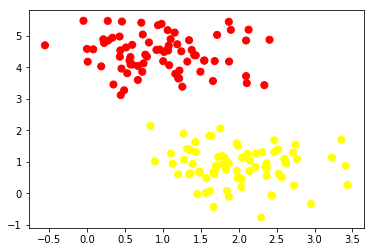

In [15]:
X,y = make_blobs(n_samples=150,n_features=2, centers=2,random_state=0,cluster_std=0.6)
# 划分数据集，80%为训练集，暂时不做
# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

## 训练SVM模型

In [16]:
model = SVC(kernel='linear',C=0.2)
model.fit(X,y)

SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 构造支持向量机

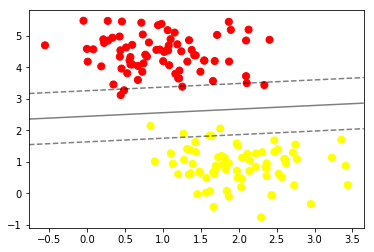

In [17]:
# jupyter notebook下要把子图和plt.gca放在一个代码块中
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
def plot_svc_decision(model,ax=None,plot_support=True):
    # Plot the decision function for a 2D SVC
    if ax is None:
        #得到子图
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X =np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    # 绘制等高线
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    #plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision(model)
plt.show()

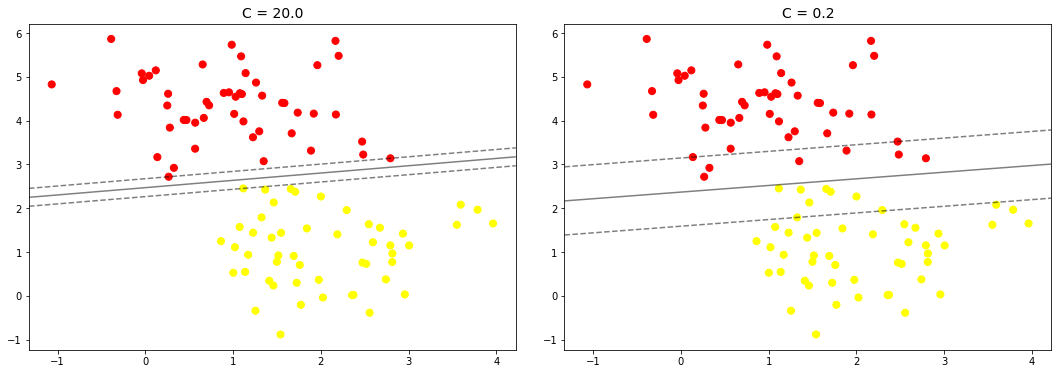

In [101]:
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [20, 0.2]): 
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision(model, axi)
    axi.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [5]:
X,y = make_blobs(n_samples=1000,n_features=2, centers=2,random_state=0,cluster_std=0.6)
# 划分数据集，80%为训练集
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [108]:
model = SVC(kernel='linear',C=0.2)
model.fit(x_train,y_train)

SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [110]:
print("SVM 模型训练集准确率: %.3f" %metrics.accuracy_score(y_train,model.predict(x_train)))
y_hat = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_hat)
print("SVM 模型测试集准确率: %.3f" %accuracy)
print(metrics.classification_report(y_test,y_hat))

SVM 模型训练集准确率: 0.999
SVM 模型测试集准确率: 0.995
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       100
          1       0.99      1.00      1.00       100

avg / total       1.00      0.99      0.99       200



In [6]:
model = SVC(kernel='linear',C=20)
model.fit(x_train,y_train)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
print("SVM 模型训练集准确率: %.3f" %metrics.accuracy_score(y_train,model.predict(x_train)))
y_hat = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_hat)
print("SVM 模型测试集准确率: %.3f" %accuracy)
print(metrics.classification_report(y_test,y_hat))

SVM 模型训练集准确率: 0.999
SVM 模型测试集准确率: 1.000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       100
          1       1.00      1.00      1.00       100

avg / total       1.00      1.00      1.00       200

